In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [15]:
import scipy
from scipy.signal import filtfilt
def PasaBajos(senal):
    """Aplica un filtro butterworth
    entrada: senial (np.array)
    salida: senial filtrada (np.array)
    """
    fs = 365 #pienso en años, como la unidad es el año, mi frec de muestreo es 365 muestras por año (señal en días)
    frec_c = 1.3 #Tres muestras por año o sea frecuencia de corte es un trimestre (2 sería 6 meses y es demasiado)
    nyq = .5*fs #Nysquits para pasarle al filtro
    frec = frec_c / nyq 
    orden = 6
    b,a = scipy.signal.butter(orden,frec,'low',analog=False,output='ba') #Filtro butterworth
    y = scipy.signal.filtfilt(b,a,senal,axis=0)
    return y


In [12]:
#Datos observados SST
import xarray as xr
path_day = '/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/sst.day.anom.1982.nc'
dato_day = xr.open_dataset(path_day)
enso_obs = dato_day.sel(lat=slice(-5,5)).sel(lon=slice(190,240)).mean(dim='lon').mean(dim='lat')
years = np.arange(1983,2024,1)
for year in years:
    path_day = '/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/sst.day.anom.'+str(year)+'.nc'
    dato_day = xr.open_dataset(path_day)
    temp = dato_day.sel(lat=slice(-5,5)).sel(lon=slice(190,240)).mean(dim='lon').mean(dim='lat')
    enso_obs = xr.concat([enso_obs,temp],dim='time')
    del temp

In [10]:
import funciones_dinamica as fd
import pandas as pd
import scipy 

time_series_obs =  np.loadtxt('/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/nino34_obs_NOAA_satellite.txt')
nino_filtrado = PasaBajos(time_series_obs)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
ccorregido, moving_average2 = fd.remover_ma(corregido1,2000)

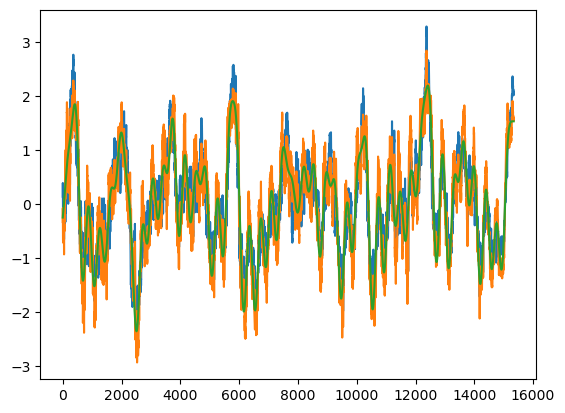

In [13]:
plt.plot(enso_obs['anom'])
plt.plot(time_series_obs - np.mean(time_series_obs))
plt.plot(nino_filtrado - np.mean(nino_filtrado))

In [4]:
from datetime import datetime, timedelta

def daily_time_array(start_date, n):
    """Generate a daily time array starting from the specified date."""
    time_array = []
    current_date = start_date
    for _ in range(n):
        time_array.append(current_date)
        current_date += timedelta(days=1)
    return time_array

# Define the start date and the length of the time array
start_date = datetime(1982, 1, 1)  # Start date: January 1, 2024
n = 15340  # Length of the time array

# Generate the daily time array
time_array = daily_time_array(start_date, n)


In [15]:
# Create a figure and axis

mean_temp = np.mean(nino_filtrado)
std_temp = np.std(nino_filtrado)
mask_below_std = nino_filtrado < (mean_temp - std_temp)
mask_above_std = nino_filtrado > (mean_temp + std_temp)

# Create and save individual frames
frames = []
for i in range(int(len(nino_filtrado)/100)):
    n = int(i*100)
    fig, ax = plt.subplots(figsize=(12, 6),dpi=300)
    # Plot the time series
    ax.plot(time_array[:n], nino_filtrado[:n], color='black', linewidth=2)
    # Set axis labels 
    ax.set_xlabel('Year',fontsize=15)
    ax.set_ylabel('Temperature (°C)',fontsize=15)
    # Plot horizontal lines for mean and ± one standard deviation
    ax.axhline(mean_temp, color='k', linestyle='-')
    ax.axhline(mean_temp + std_temp, color='k', linestyle='--', label='+1 SD')
    ax.axhline(mean_temp - std_temp, color='k', linestyle='--', label='-1 SD')
    # Shade the areas below - one standard deviation with blue
    ax.fill_between(time_array[:n], nino_filtrado[:n], mean_temp - std_temp, where=mask_below_std[:n], color='blue', alpha=0.3)
    # Shade the areas above + one standard deviation with red
    ax.fill_between(time_array[:n], nino_filtrado[:n], mean_temp + std_temp, where=mask_above_std[:n], color='red', alpha=0.3)
    # Customize the appearance of the plot
    #ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlim(time_array[0],time_array[-1])
    ax.set_ylim(24.5,29.5)
    plt.tight_layout()
    filename = '/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/'+f'frame_{i:03d}.png'  # Save each frame with a unique filename
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()

# Convert frames to gif
imageio.mimsave('/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/time_series2.gif', frames, duration=0.1)  # Adjust duration as needed



/var/folders/50/49j6_slj4k9bq1x354fp5jwh0000gn/T/ipykernel_37103/3850745087.py:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


In [16]:
# Create a figure and axis

mean_temp = np.mean(enso_obs['anom'])
std_temp = np.std(enso_obs['anom'])
mask_below_std = enso_obs['anom'] < (mean_temp - std_temp)
mask_above_std = enso_obs['anom'] > (mean_temp + std_temp)

# Create and save individual frames
frames = []
for i in range(int(len(nino_filtrado)/100)):
    n = int(i*100)
    fig, ax = plt.subplots(figsize=(12, 6),dpi=300)
    # Plot the time series
    ax.plot(time_array[:n], enso_obs['anom'][:n], color='black', linewidth=2)
    # Set axis labels 
    ax.set_xlabel('Year',fontsize=15)
    ax.set_ylabel('Temperature (°C)',fontsize=15)
    # Plot horizontal lines for mean and ± one standard deviation
    ax.axhline(mean_temp, color='k', linestyle='-')
    ax.axhline(mean_temp + std_temp, color='k', linestyle='--', label='+1 SD')
    ax.axhline(mean_temp - std_temp, color='k', linestyle='--', label='-1 SD')
    # Shade the areas below - one standard deviation with blue
    ax.fill_between(time_array[:n], enso_obs['anom'][:n], mean_temp - std_temp, where=mask_below_std[:n], color='blue', alpha=0.3)
    # Shade the areas above + one standard deviation with red
    ax.fill_between(time_array[:n], enso_obs['anom'][:n], mean_temp + std_temp, where=mask_above_std[:n], color='red', alpha=0.3)
    # Customize the appearance of the plot
    #ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlim(time_array[0],time_array[-1])
    ax.set_ylim(-2.5,2.5)
    plt.tight_layout()
    filename = '/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/'+f'frame_{i:03d}.png'  # Save each frame with a unique filename
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()

# Convert frames to gif
imageio.mimsave('/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/time_series3.gif', frames, duration=0.1)  # Adjust duration as needed


/var/folders/50/49j6_slj4k9bq1x354fp5jwh0000gn/T/ipykernel_37103/825153225.py:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


In [ ]:
# Convert frames to gif
imageio.mimsave('/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/time_series_rapido2.gif', frames[::5], duration=0.001)  # Adjust duration as needed


In [44]:
df = fd.embedding(30,np.array(nino_filtrado)-np.mean(nino_filtrado))
from mpl_toolkits.mplot3d import Axes3D

def plot_orbita(df,inicio,fin,color='-k'):
  """                                                                                                                                                    
  Scaling is done from here...                                                                                                                           
  """
  x_scale=1
  y_scale=1
  z_scale=1

  scale=np.diag([x_scale, y_scale, z_scale, 1.0])
  scale=scale*(1.0/scale.max())
  scale[3,3]=1.2


  def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)

  fig = plt.figure(figsize=(10,12),dpi=300)
  ax = fig.add_subplot(111, projection='3d')
  ax.get_proj=short_proj
  ax.plot(df[0][inicio:fin], df[1][inicio:fin], df[2][inicio:fin],color,linewidth=2)
  ax.set_xlim(-3,3)
  ax.set_ylim(-3,3)
  ax.set_zlim3d(-3,3)
  ax.set_xticks([-2, 0, 2])
  ax.set_yticks([-2, 0, 2])
  ax.set_zticks([-2, 0, 2])
  #ax.set_xticklabels([25,27,29])
  #ax.set_yticklabels([25,27,29])
  #ax.set_zticklabels([25,27,29])
  ax.tick_params(axis='both', labelsize= 18)
  ax.set_xlabel(r'SST$_{obs}$(t)',fontsize=20)
  ax.set_ylabel(r'SST$_{obs}$(t-$\tau$)',fontsize=20)
  ax.set_zlabel(r'SST$_{obs}$(t-2$\tau$)',fontsize=20)
  return ax

def plot_orbita_gif(df,inicio,fin,color='-k'):
  """                                                                                                                                                    
  Scaling is done from here...                                                                                                                           
  """
  x_scale=1
  y_scale=1
  z_scale=1

  scale=np.diag([x_scale, y_scale, z_scale, 1.0])
  scale=scale*(1.0/scale.max())
  scale[3,3]=1.2


  def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)

  # Create and save individual frames
  frames = []
  length = fin - inicio
  for i in range(int(length/10)):
    n = int(i*10)
    fig = plt.figure(figsize=(10,12),dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    ax.get_proj=short_proj
    ax.plot(df[0][inicio:inicio+n], df[1][inicio:inicio+n], df[2][inicio:inicio+n],color,linewidth=2)
    ax.scatter(df[0][inicio+n], df[1][inicio+n], df[2][inicio+n],color='red',s=20)
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_zlim3d(-3,3)
    ax.set_xticks([-2, 0, 2])
    ax.set_yticks([-2, 0, 2])
    ax.set_zticks([-2, 0, 2])
    ax.set_xticklabels([25,27,29])
    ax.set_yticklabels([25,27,29])
    ax.set_zticklabels([25,27,29])
    ax.tick_params(axis='both', labelsize= 18)
    ax.set_xlabel(r'SST$_{obs}$(t)',fontsize=20)
    ax.set_ylabel(r'SST$_{obs}$(t-$\tau$)',fontsize=20)
    ax.set_zlabel(r'SST$_{obs}$(t-2$\tau$)',fontsize=20)
    plt.tight_layout()
    filename = '/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/'+f'frame_{i:03d}.png'  # Save each frame with a unique filename
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()

  # Convert frames to gif
  imageio.mimsave('/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/embedding_obs_abs_axis.gif', frames, duration=0.1)  # Adjust duration as needed

#fig = plot_orbita_gif(df,0,15277)

In [5]:
frames = []
length = 15000
for i in range(int(length/10)):
    filename = '/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/'+f'frame_{i:03d}.png'  # Save each frame with a unique filename
    frames.append(imageio.imread(filename))
    
imageio.mimsave('/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Gifs/embedding_obs3.gif', frames[::10], duration=0.1)  # Adjust duration as needed


/var/folders/50/49j6_slj4k9bq1x354fp5jwh0000gn/T/ipykernel_37103/2460311826.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))


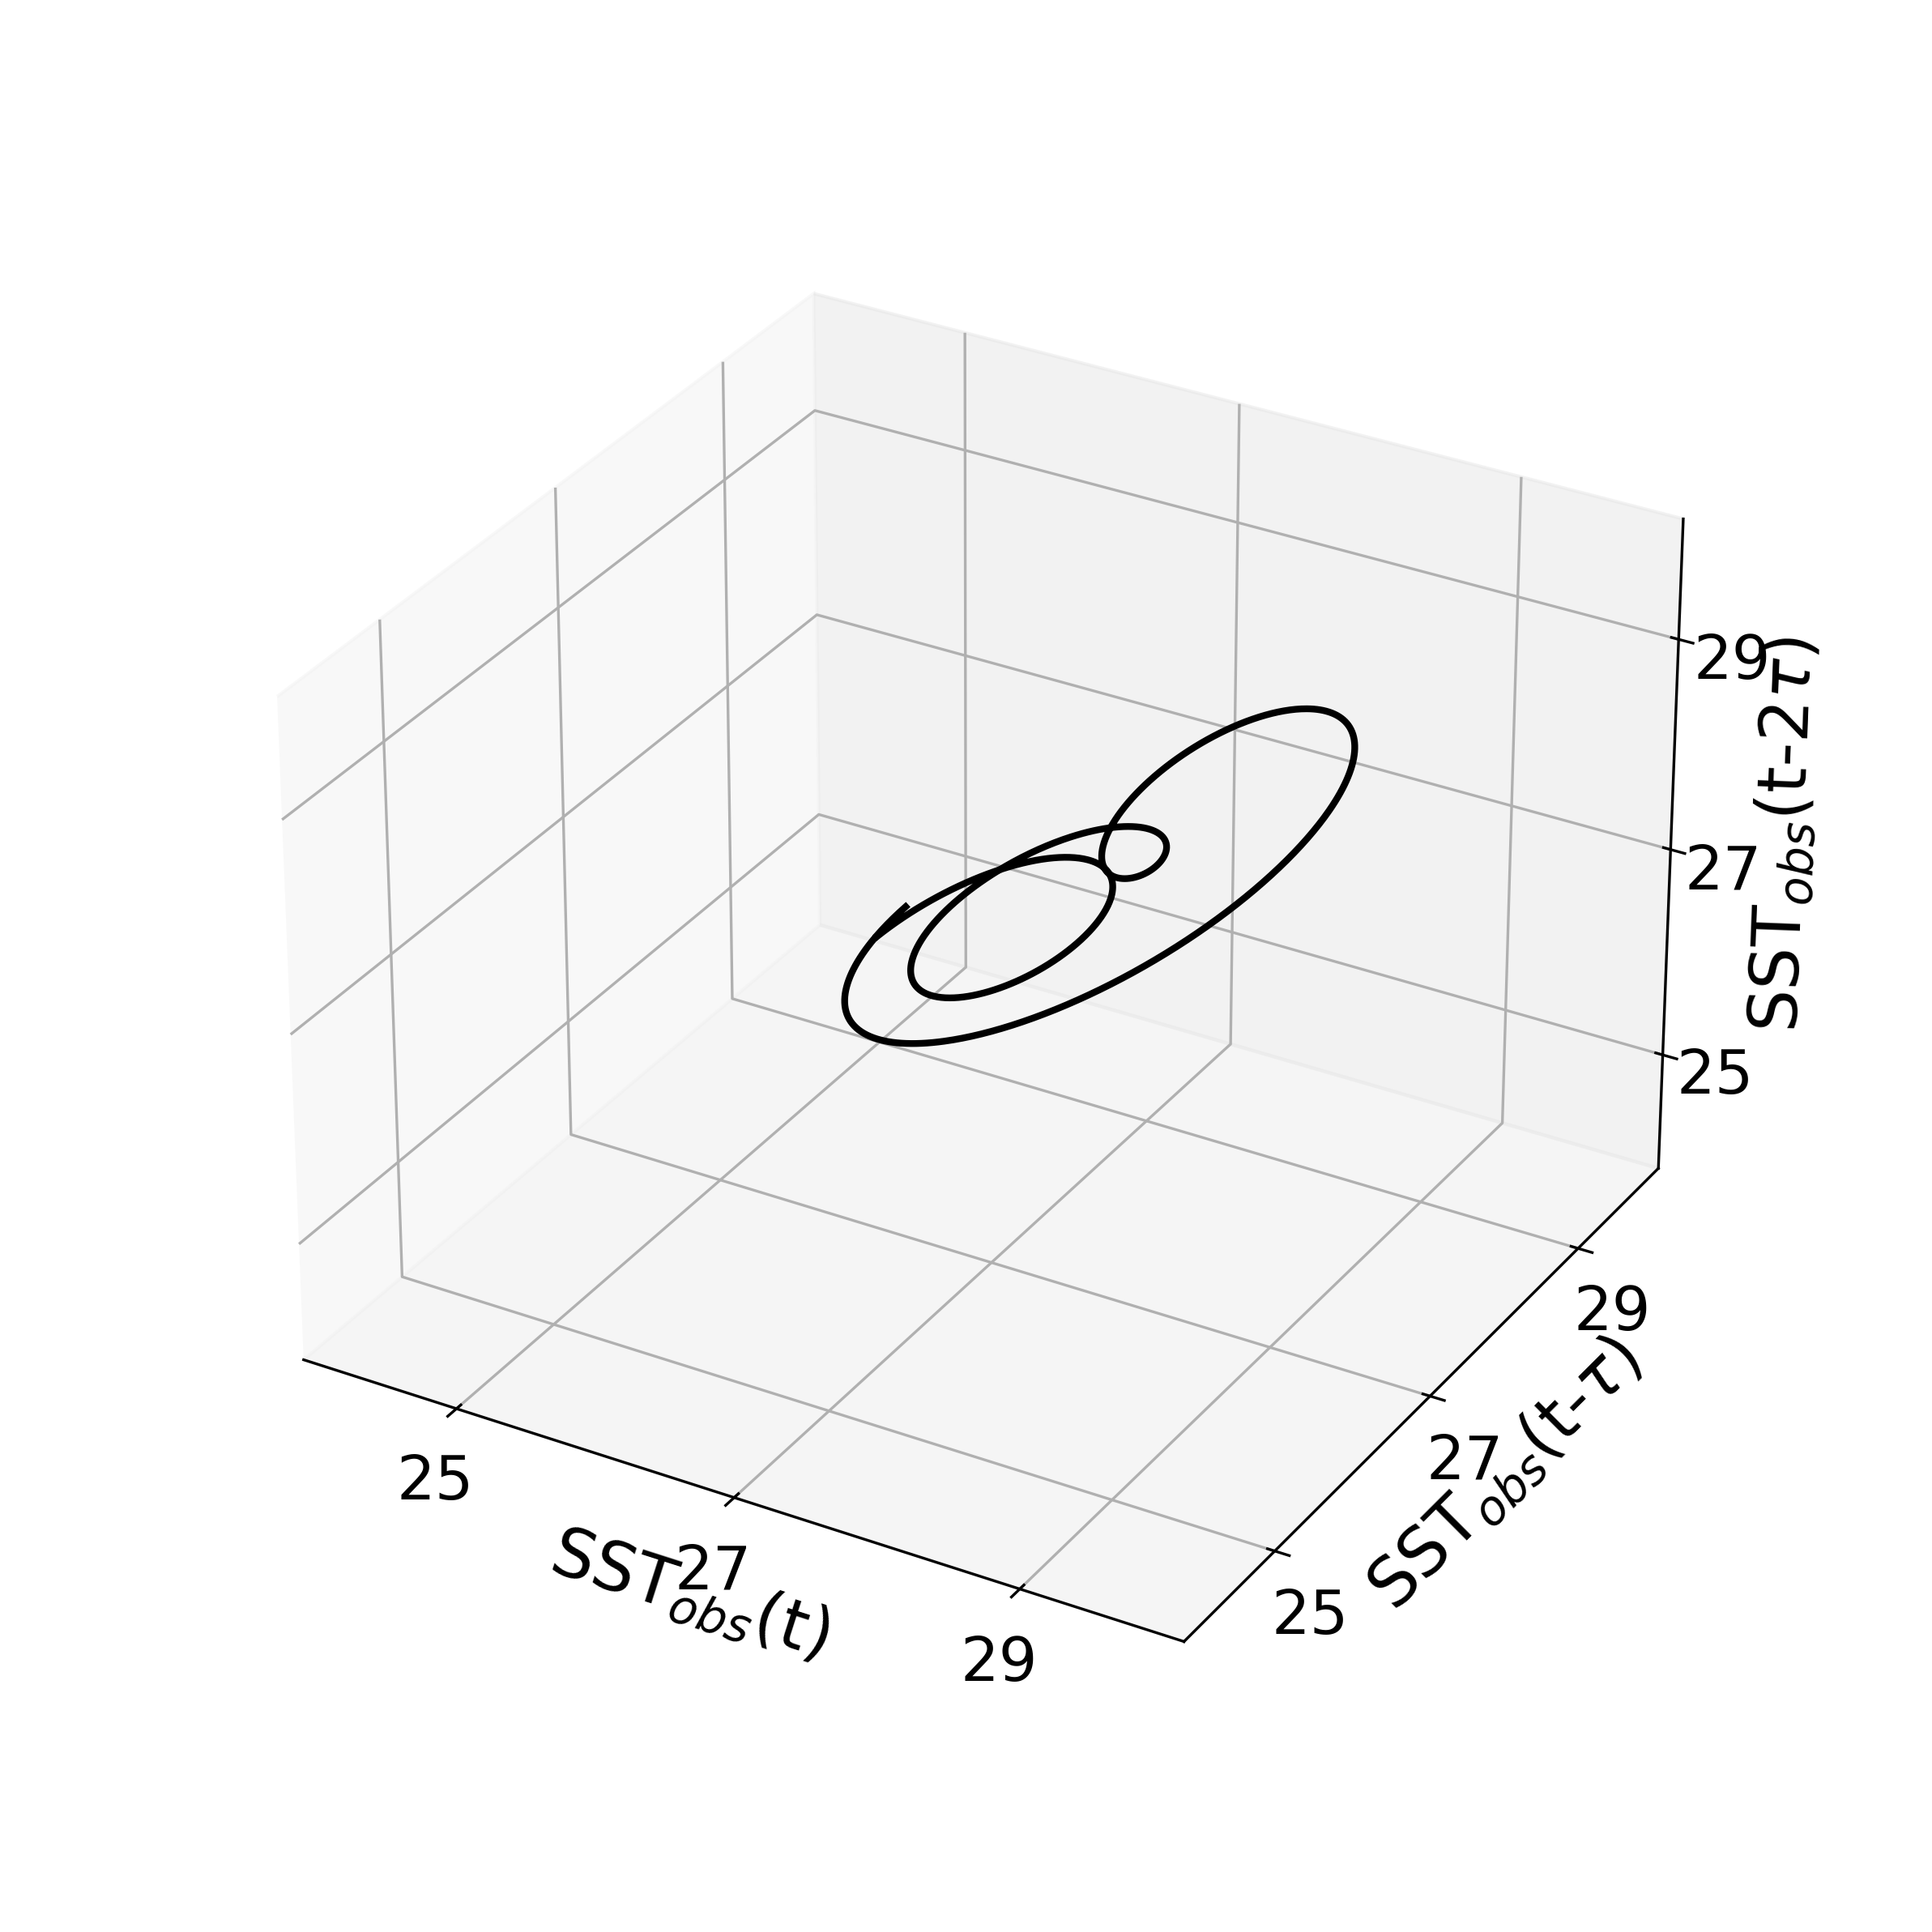

In [16]:
df = fd.embedding(30,np.array(nino_filtrado)-np.mean(nino_filtrado))
fig = plot_orbita(df,2920,4000)

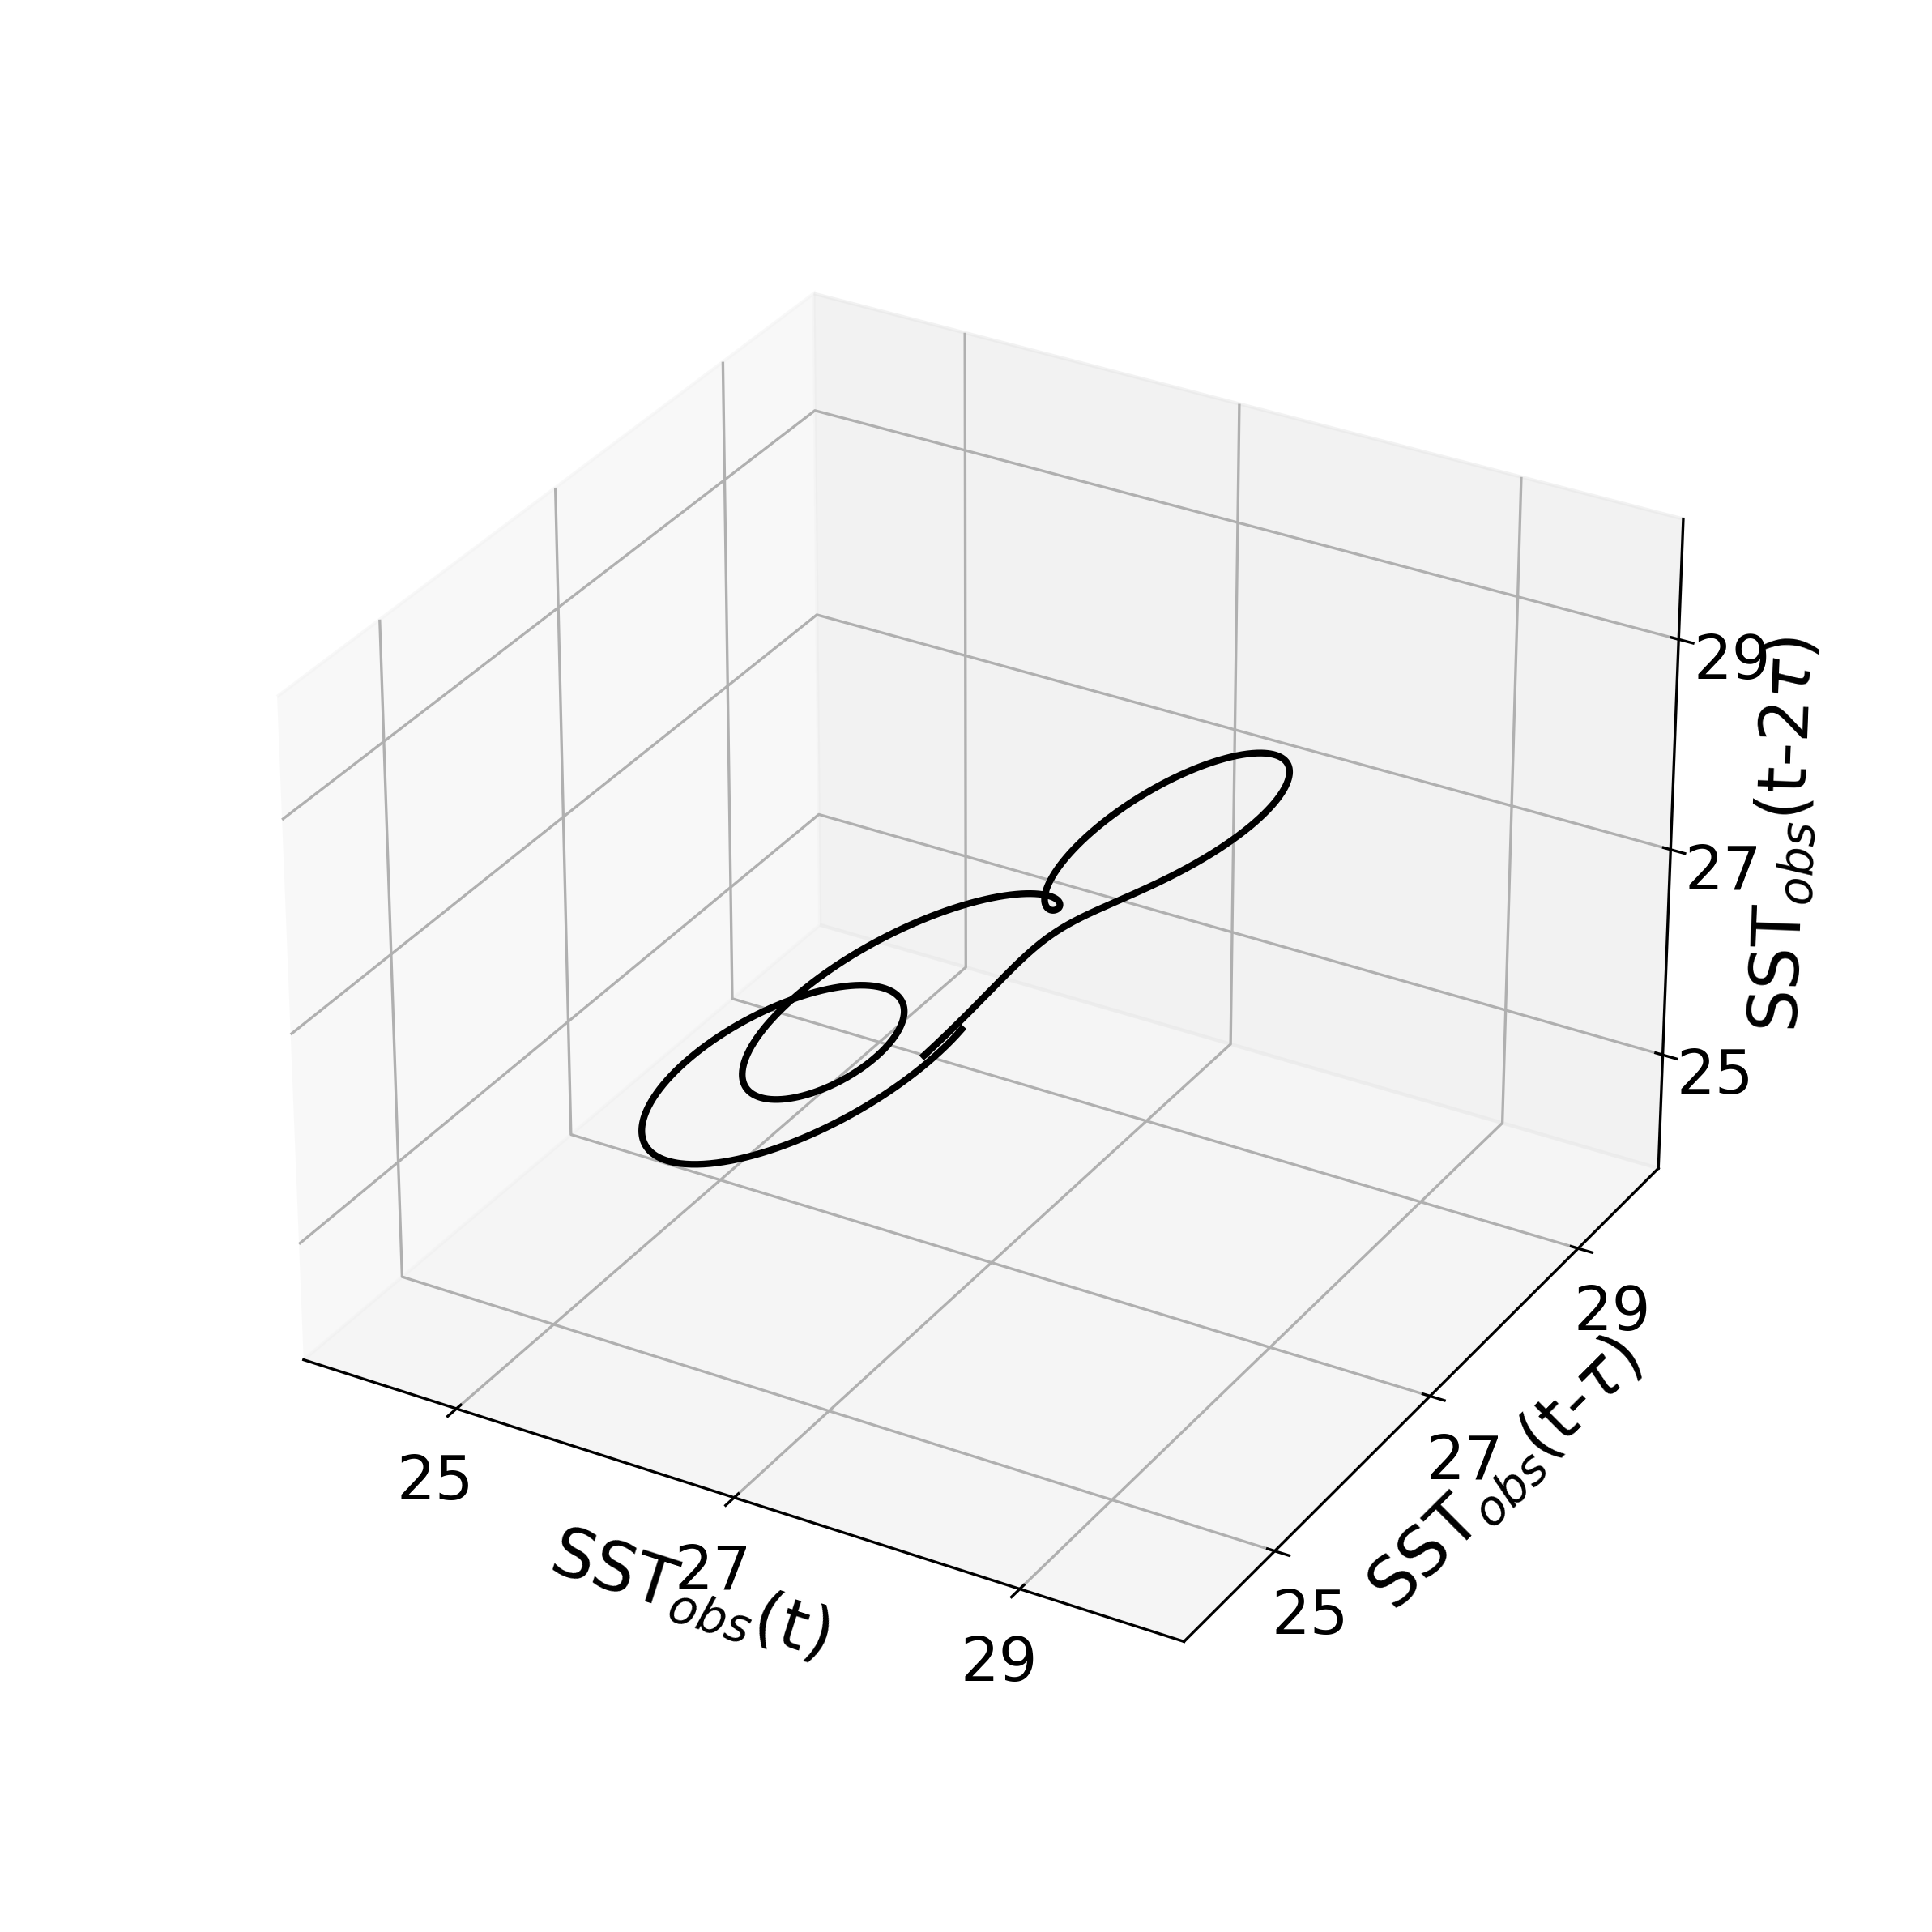

In [28]:
ini = 900; fin = 2300
fig = plot_orbita(df,ini,fin)

In [34]:
import glob
path_integraciones = '/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Codigos/ENSO_2020'
lista3=[]
lista3=glob.glob(path_integraciones+'/periodo4/*.txt')
lista3.sort()

print(len(lista3))
datos = []
for file in lista3:
  datos.append(np.loadtxt(file))


5


In [221]:
import numpy as np
import random

def rk4(dv,v,n,t,dt,e1):
    v1=[]
    k1=[]
    k2=[]
    k3=[]
    k4=[]
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2=dt/2.0
    dt6=dt/6.0
    for x in range(0, n):
        v1[x]=v[x]
    dv(v1, k1,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt2*k1[x]
    dv(v1, k2,e1)     
    for x in range(0, n):
        v1[x]=v[x]+dt2*k2[x]
    dv(v1, k3,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k3[x]
    dv(v1, k4,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k4[x]        
    for x in range(0, n):
        v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v


def ecuaciones(v, dv,eps1):
    """Defino la ecuacion diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    A, eps2,omega = 8,1,4.4 #Cerca de la lengua de arnold de periodo 4, pero donde hay caos
    #A=A*(1+4.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv

for m in range(1):
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.*(1+0.5*random.normalvariate(0,0.5))
    v[1]=3.*(1+0.5*random.normalvariate(0,0.5))
    v[2]=2.*(1+0.5*random.normalvariate(0,0.5))
    dt=0.0036
    t=0.0
    t_pre=0.0
    t_max=1000.0
    x=[]
    y=[]
    z=[]
    cont=0
    while t<t_max:
        eps1 = 0.2 #*(1+0.5*random.normalvariate(0,0.5))
        rk4(ecuaciones,v,n,t,dt,eps1)
        t+=dt
        x.append(cont)  #ACa ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1

    out = x[:60000]
    out_force = 8*np.cos(z)

In [204]:
2*np.pi/4.4 /0.0036

396.66573908962033

In [220]:
out_wo_force = out

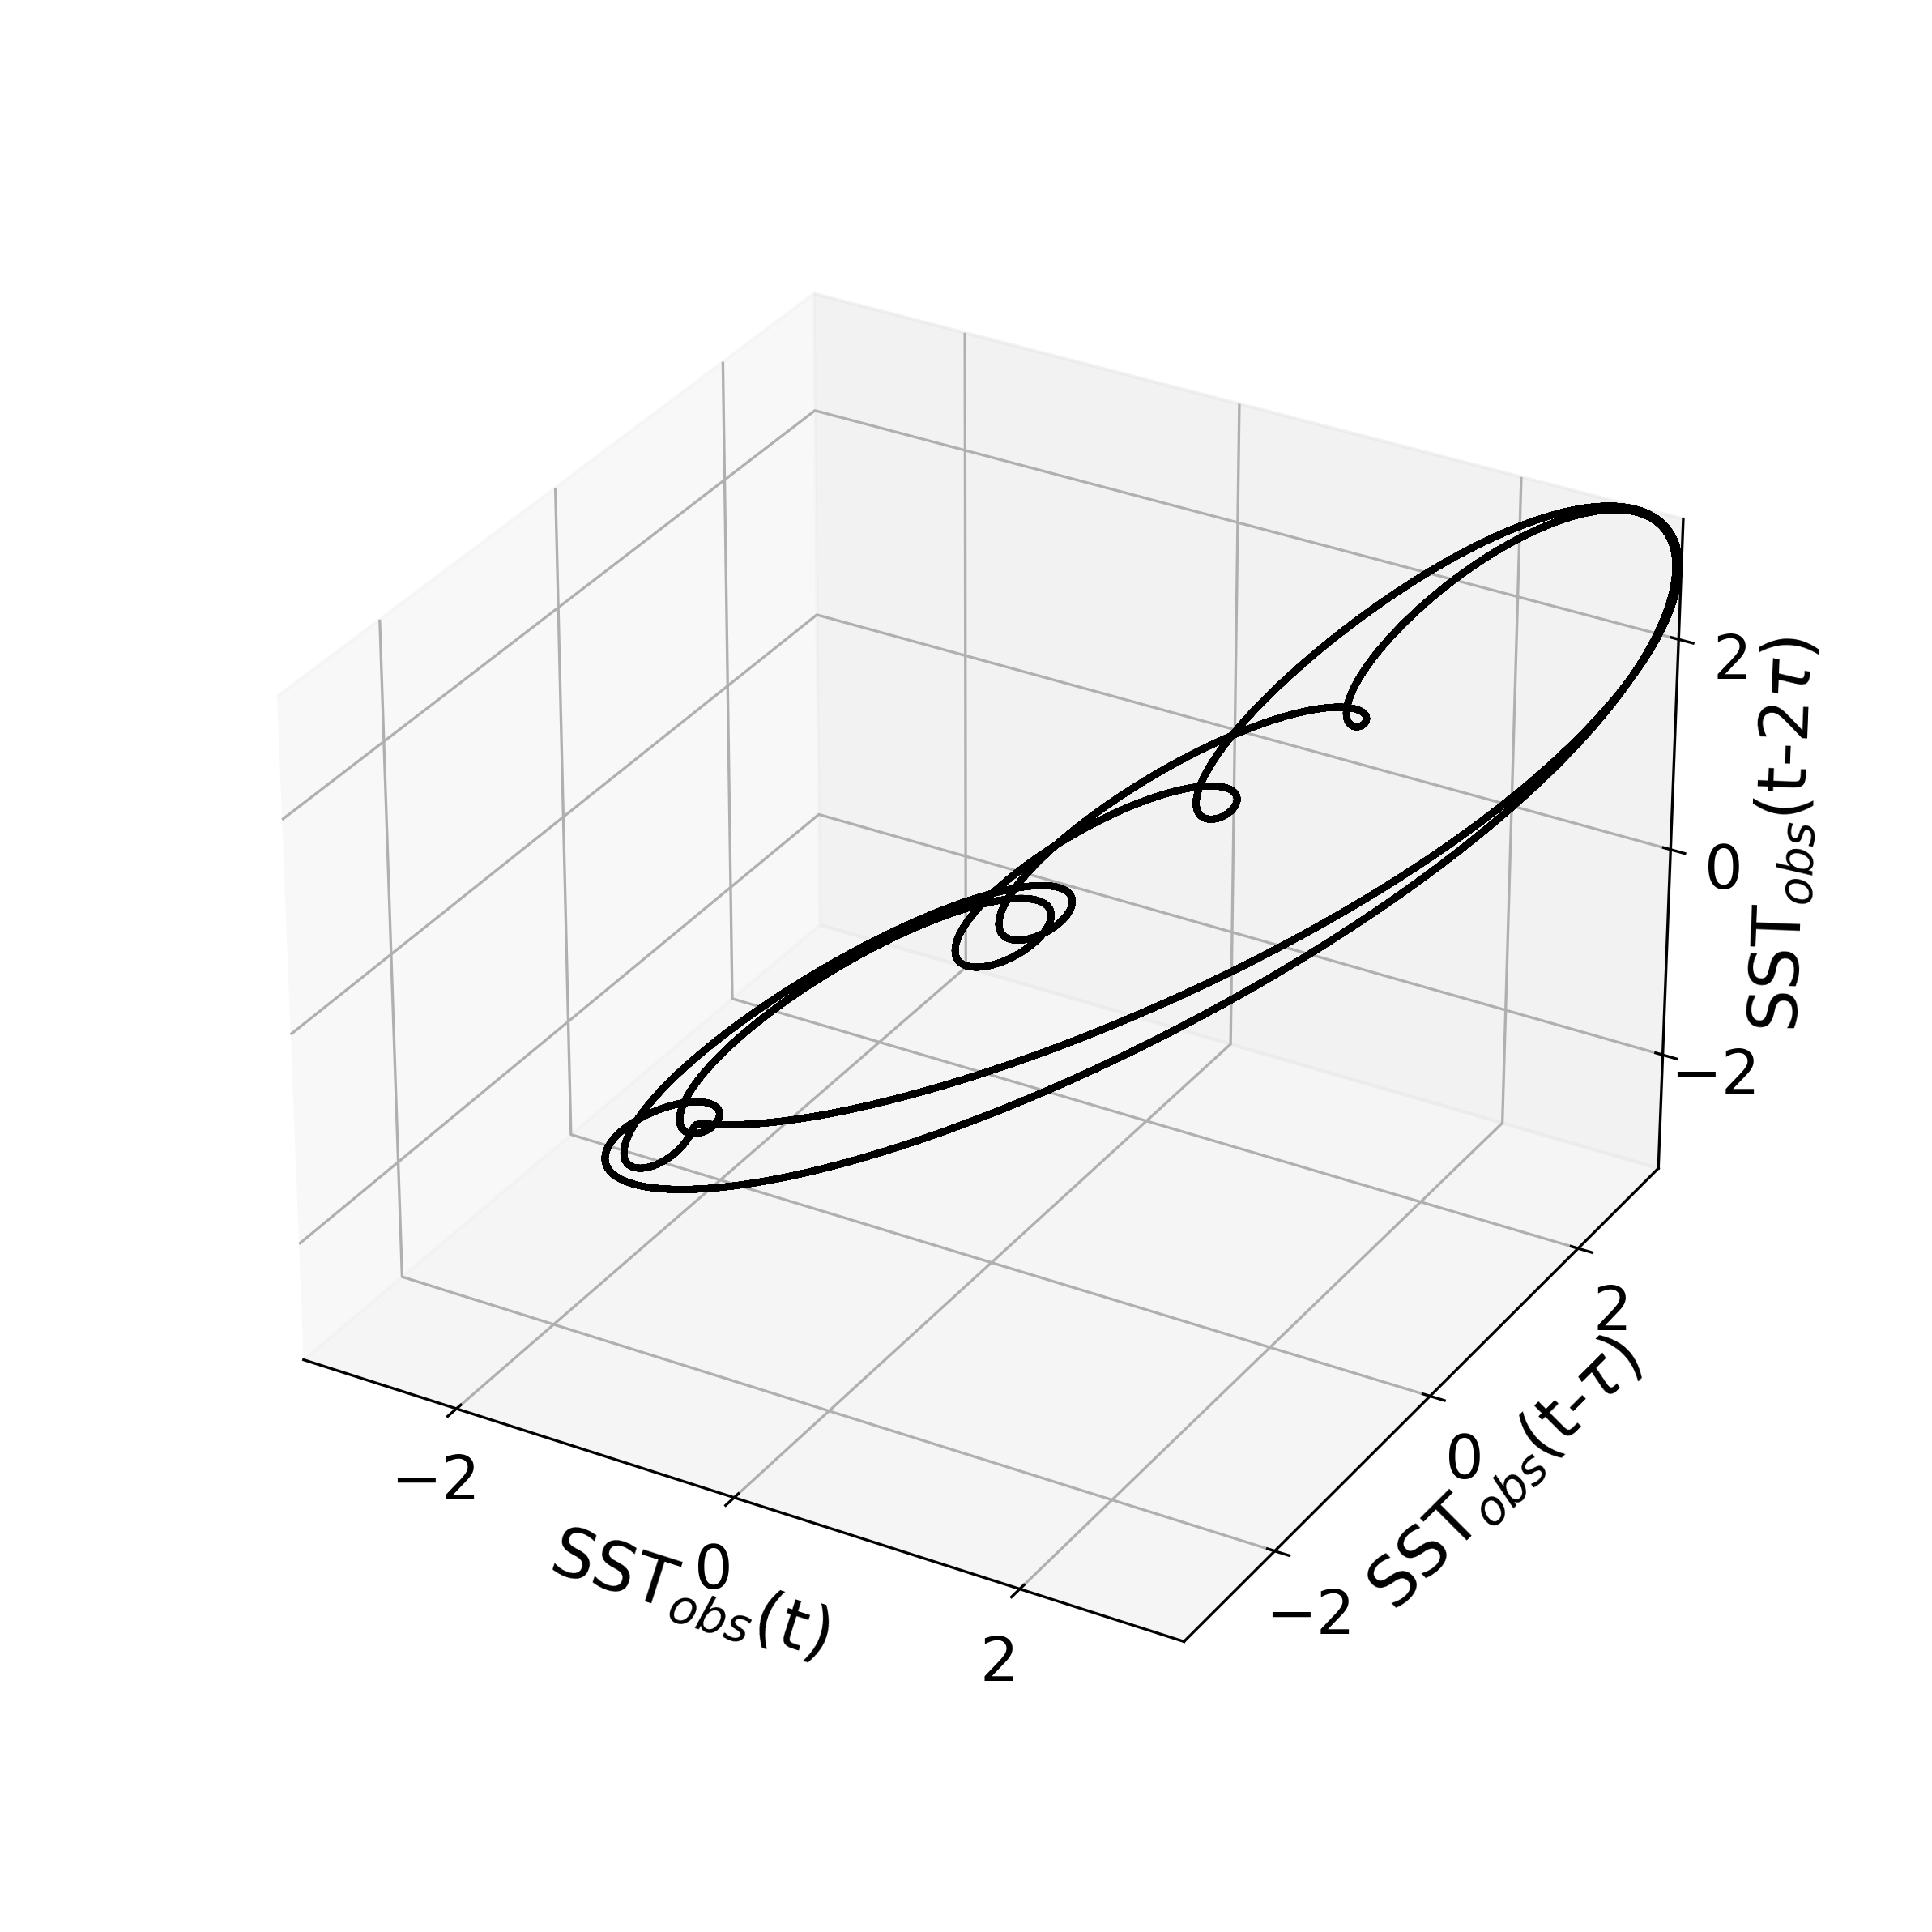

In [206]:
df_4 = fd.embedding(30,np.array(out[20000:]))
fig = plot_orbita(df_4,0,30000)

In [216]:

def plot_timeseries(time,nino,dt=365):
    ticks = np.arange(0,len(nino),dt)
    mean_temp = np.mean(nino)
    std_temp = np.std(nino)
    mask_below_std = nino < (mean_temp - std_temp)
    mask_above_std = nino > (mean_temp + std_temp)

    # Create and save individual frames
    fig, ax = plt.subplots(figsize=(25, 6),dpi=300)
    # Plot the time series
    ax.plot(time[:], nino[:], color='black', linewidth=2)
    # Set axis labels 
    ax.set_xlabel('T = 2π/ωdt ',fontsize=20)
    ax.set_ylabel('Temperature (°C)',fontsize=20)
    # Plot horizontal lines for mean and ± one standard deviation
    ax.axhline(mean_temp, color='k', linestyle='-')
    ax.axhline(mean_temp + std_temp, color='k', linestyle='--', label='+1 SD')
    ax.axhline(mean_temp - std_temp, color='k', linestyle='--', label='-1 SD')
    # Shade the areas below - one standard deviation with blue
    ax.fill_between(time[:], nino[:], mean_temp - std_temp, where=mask_below_std[:], color='blue', alpha=0.3)
    # Shade the areas above + one standard deviation with red
    ax.fill_between(time[:], nino[:], mean_temp + std_temp, where=mask_above_std[:], color='red', alpha=0.3)
    # Customize the appearance of the plot
    #ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(ticks)
    ax.set_xticklabels(np.arange(0,len(ticks),1),fontsize=18)
    ax.set_yticks(np.arange(-9,9,1))
    ax.set_yticklabels(np.arange(-9,9,1),fontsize=18)
    ax.tick_params(axis='x', rotation=0)
    ax.set_xlim(time[0],time[-1])
    ax.set_ylim(-9,9)
    return fig

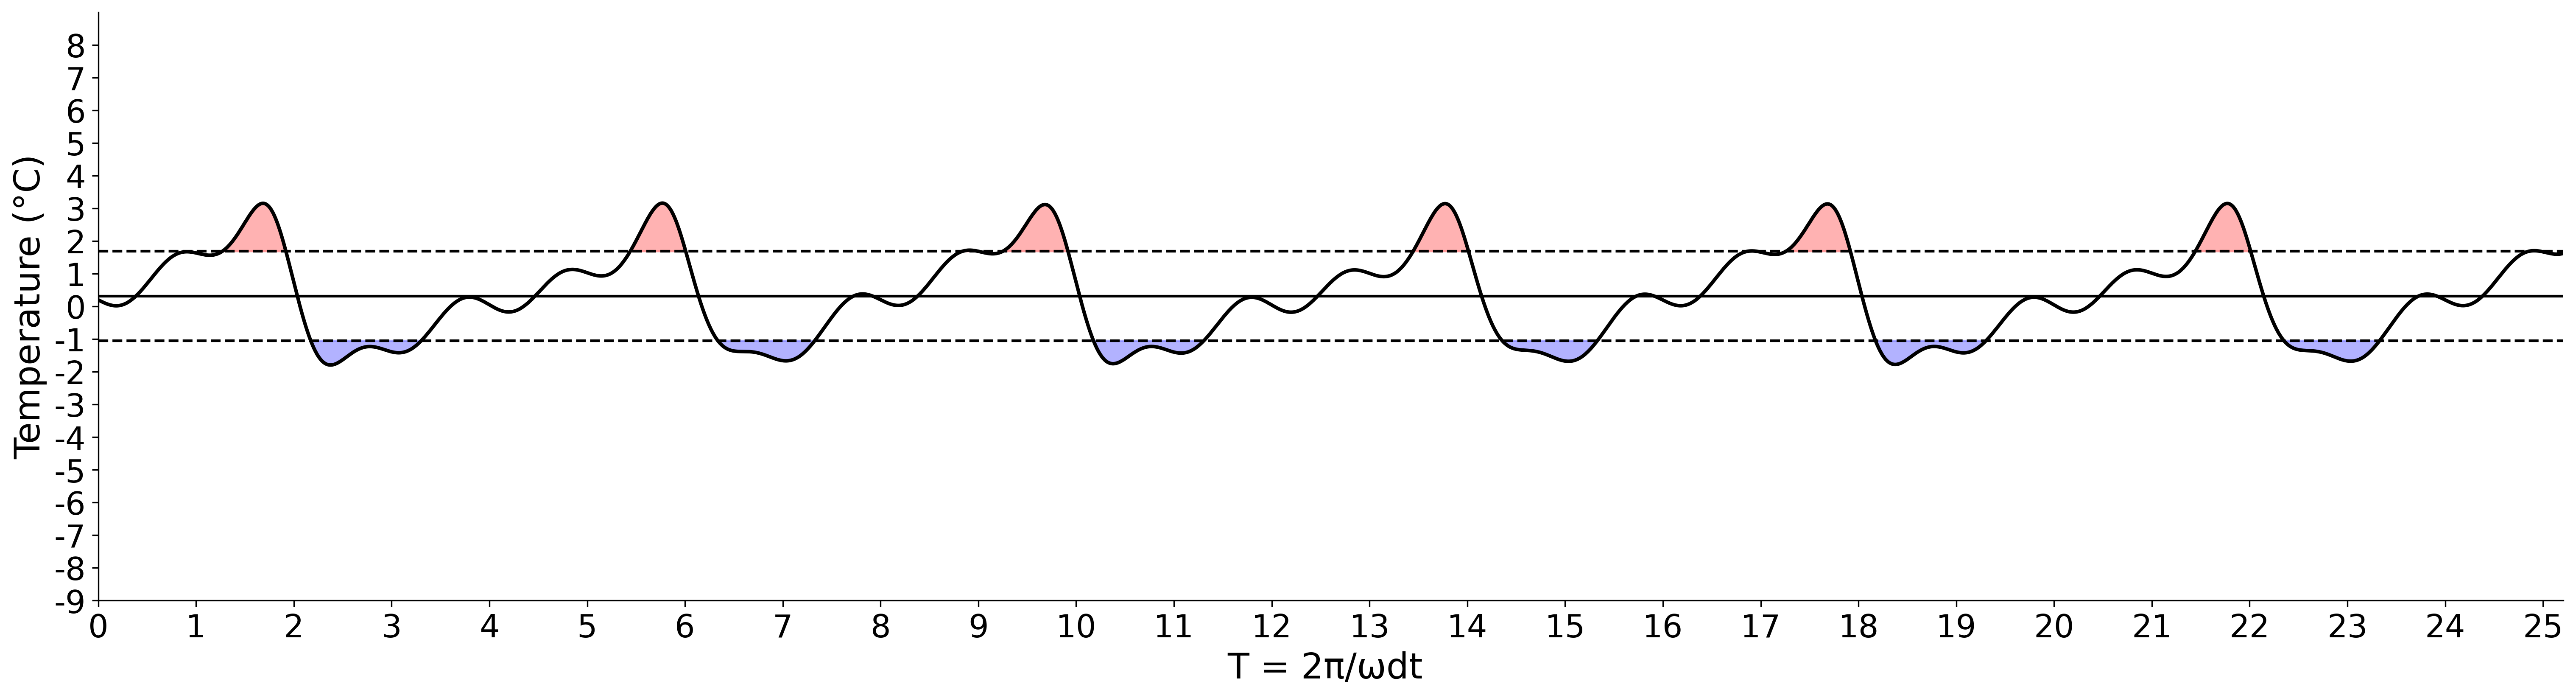

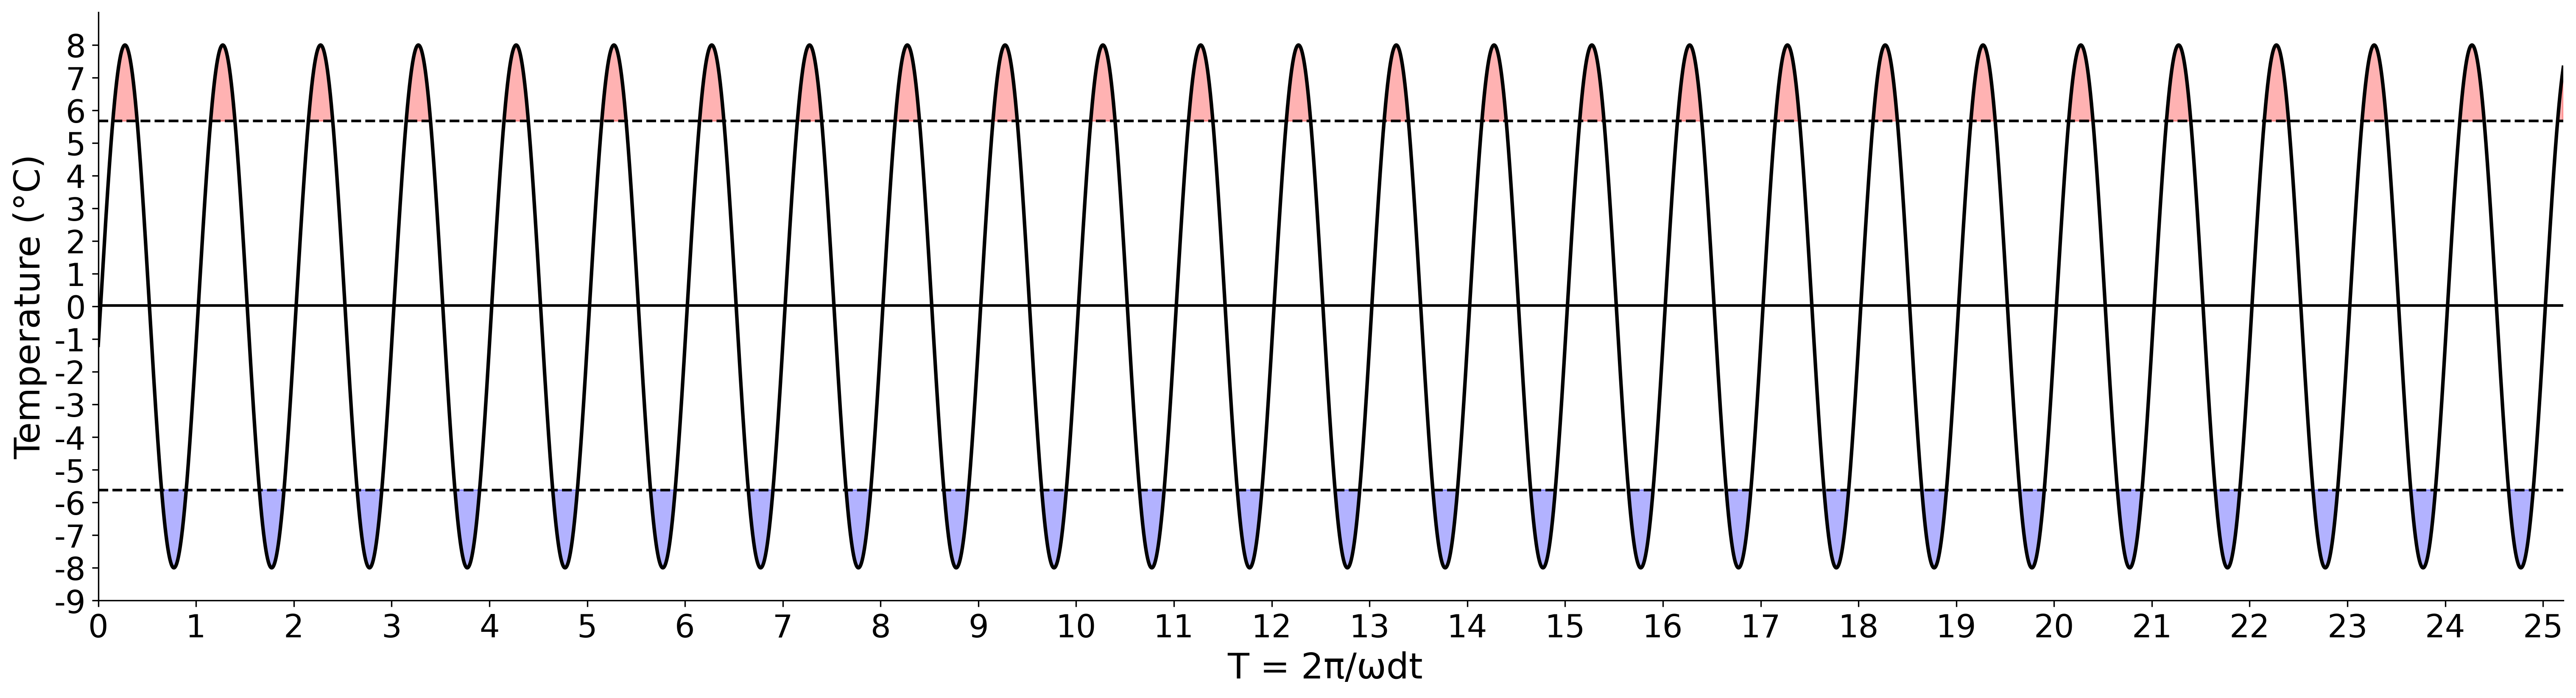

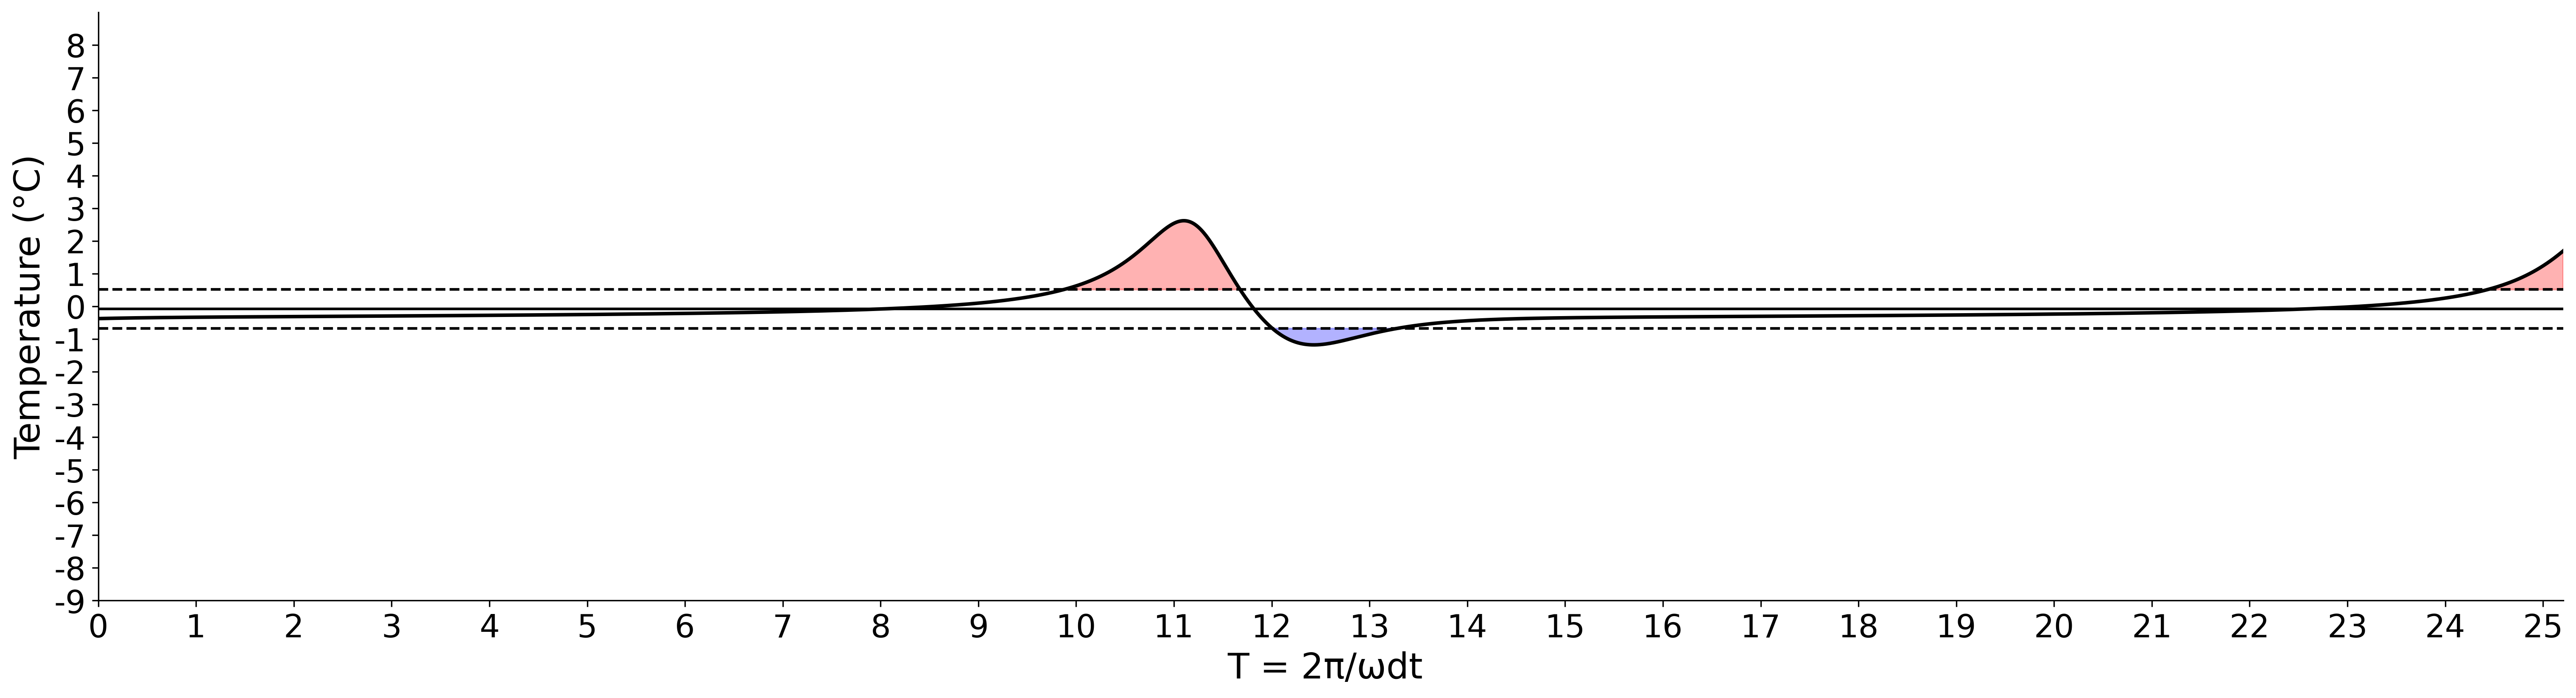

In [222]:
fig = plot_timeseries(np.arange(len(out[20000:30000])),out[20000:30000],396.66573908962033)
fig = plot_timeseries(np.arange(len(out_force[20000:30000])),out_force[20000:30000],396.66573908962033)
fig = plot_timeseries(np.arange(len(out_wo_force[20000:30000])),out_wo_force[20000:30000],396.66573908962033)


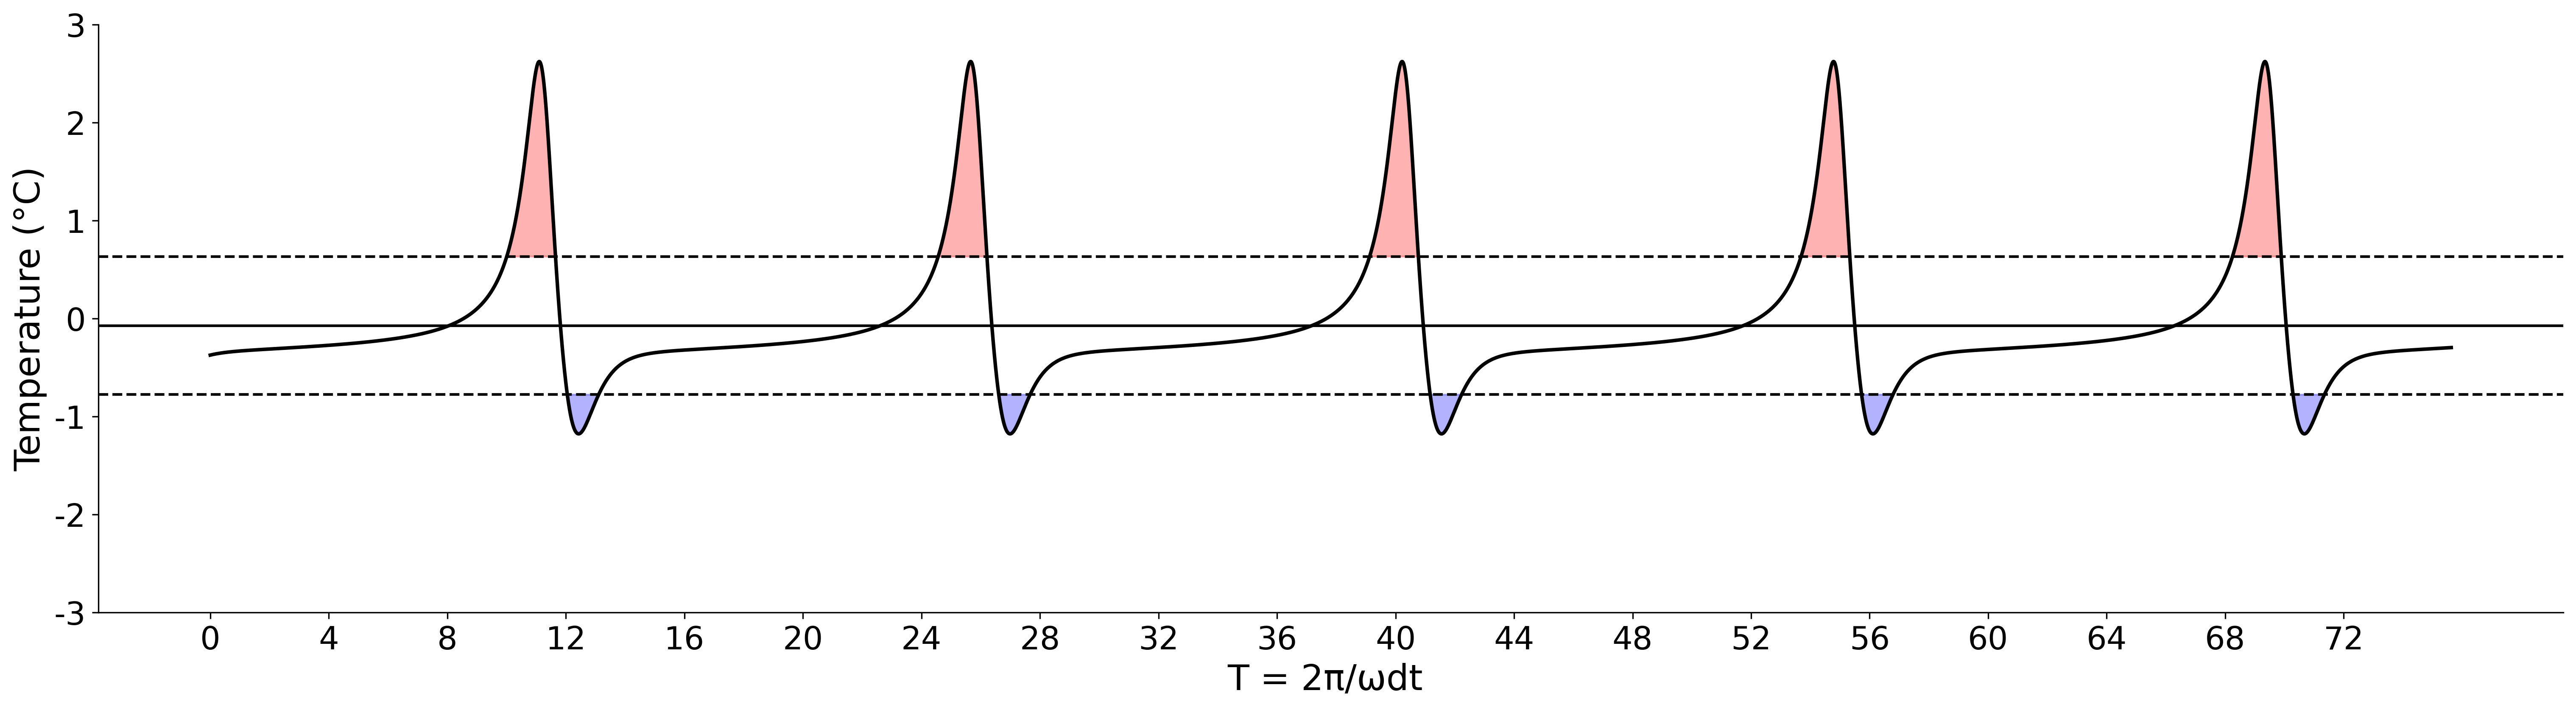

In [230]:
fig = plot_timeseries_free(np.arange(len(out_wo_force[20000:50000])),out_wo_force[20000:50000],396.66573908962033)

In [229]:
def plot_timeseries_free(time,nino,dt=365):
    ticks = np.arange(0,len(nino),dt*4)
    mean_temp = np.mean(nino)
    std_temp = np.std(nino)
    mask_below_std = nino < (mean_temp - std_temp)
    mask_above_std = nino > (mean_temp + std_temp)

    # Create and save individual frames
    fig, ax = plt.subplots(figsize=(25, 6),dpi=300)
    # Plot the time series
    ax.plot(time[:], nino[:], color='black', linewidth=2)
    # Set axis labels 
    ax.set_xlabel('T = 2π/ωdt ',fontsize=20)
    ax.set_ylabel('Temperature (°C)',fontsize=20)
    # Plot horizontal lines for mean and ± one standard deviation
    ax.axhline(mean_temp, color='k', linestyle='-')
    ax.axhline(mean_temp + std_temp, color='k', linestyle='--', label='+1 SD')
    ax.axhline(mean_temp - std_temp, color='k', linestyle='--', label='-1 SD')
    # Shade the areas below - one standard deviation with blue
    ax.fill_between(time[:], nino[:], mean_temp - std_temp, where=mask_below_std[:], color='blue', alpha=0.3)
    # Shade the areas above + one standard deviation with red
    ax.fill_between(time[:], nino[:], mean_temp + std_temp, where=mask_above_std[:], color='red', alpha=0.3)
    # Customize the appearance of the plot
    #ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(ticks)
    ax.set_xticklabels(np.arange(0,len(ticks),1)*4,fontsize=18)
    ax.set_yticks(np.arange(-3,4,1))
    ax.set_yticklabels(np.arange(-3,4,1),fontsize=18)
    ax.tick_params(axis='x', rotation=0)
    return fig

In [246]:
path = '/Users/jumindlin/Dropbox/Cursos_Materias/DNL/ENSO/Paper/Datos/CESM2_simulaciones'
NINO = pd.read_csv(path+'/timeseries_CESM2_4.csv', header=0)
serie = NINO['NINO_CESM2_4']

nino_filtrado = fd.PasaBajos(serie)
corregido1, moving_average = fd.remover_ma(nino_filtrado,2000)
corregido, moving_average2 = fd.remover_ma(corregido1,2000)

# close returns for plot
#x, y = fd.close_returns_for_plot(corregido)
# plot
#fig = fd.figure_cr(x,y,1600,10000,2000)

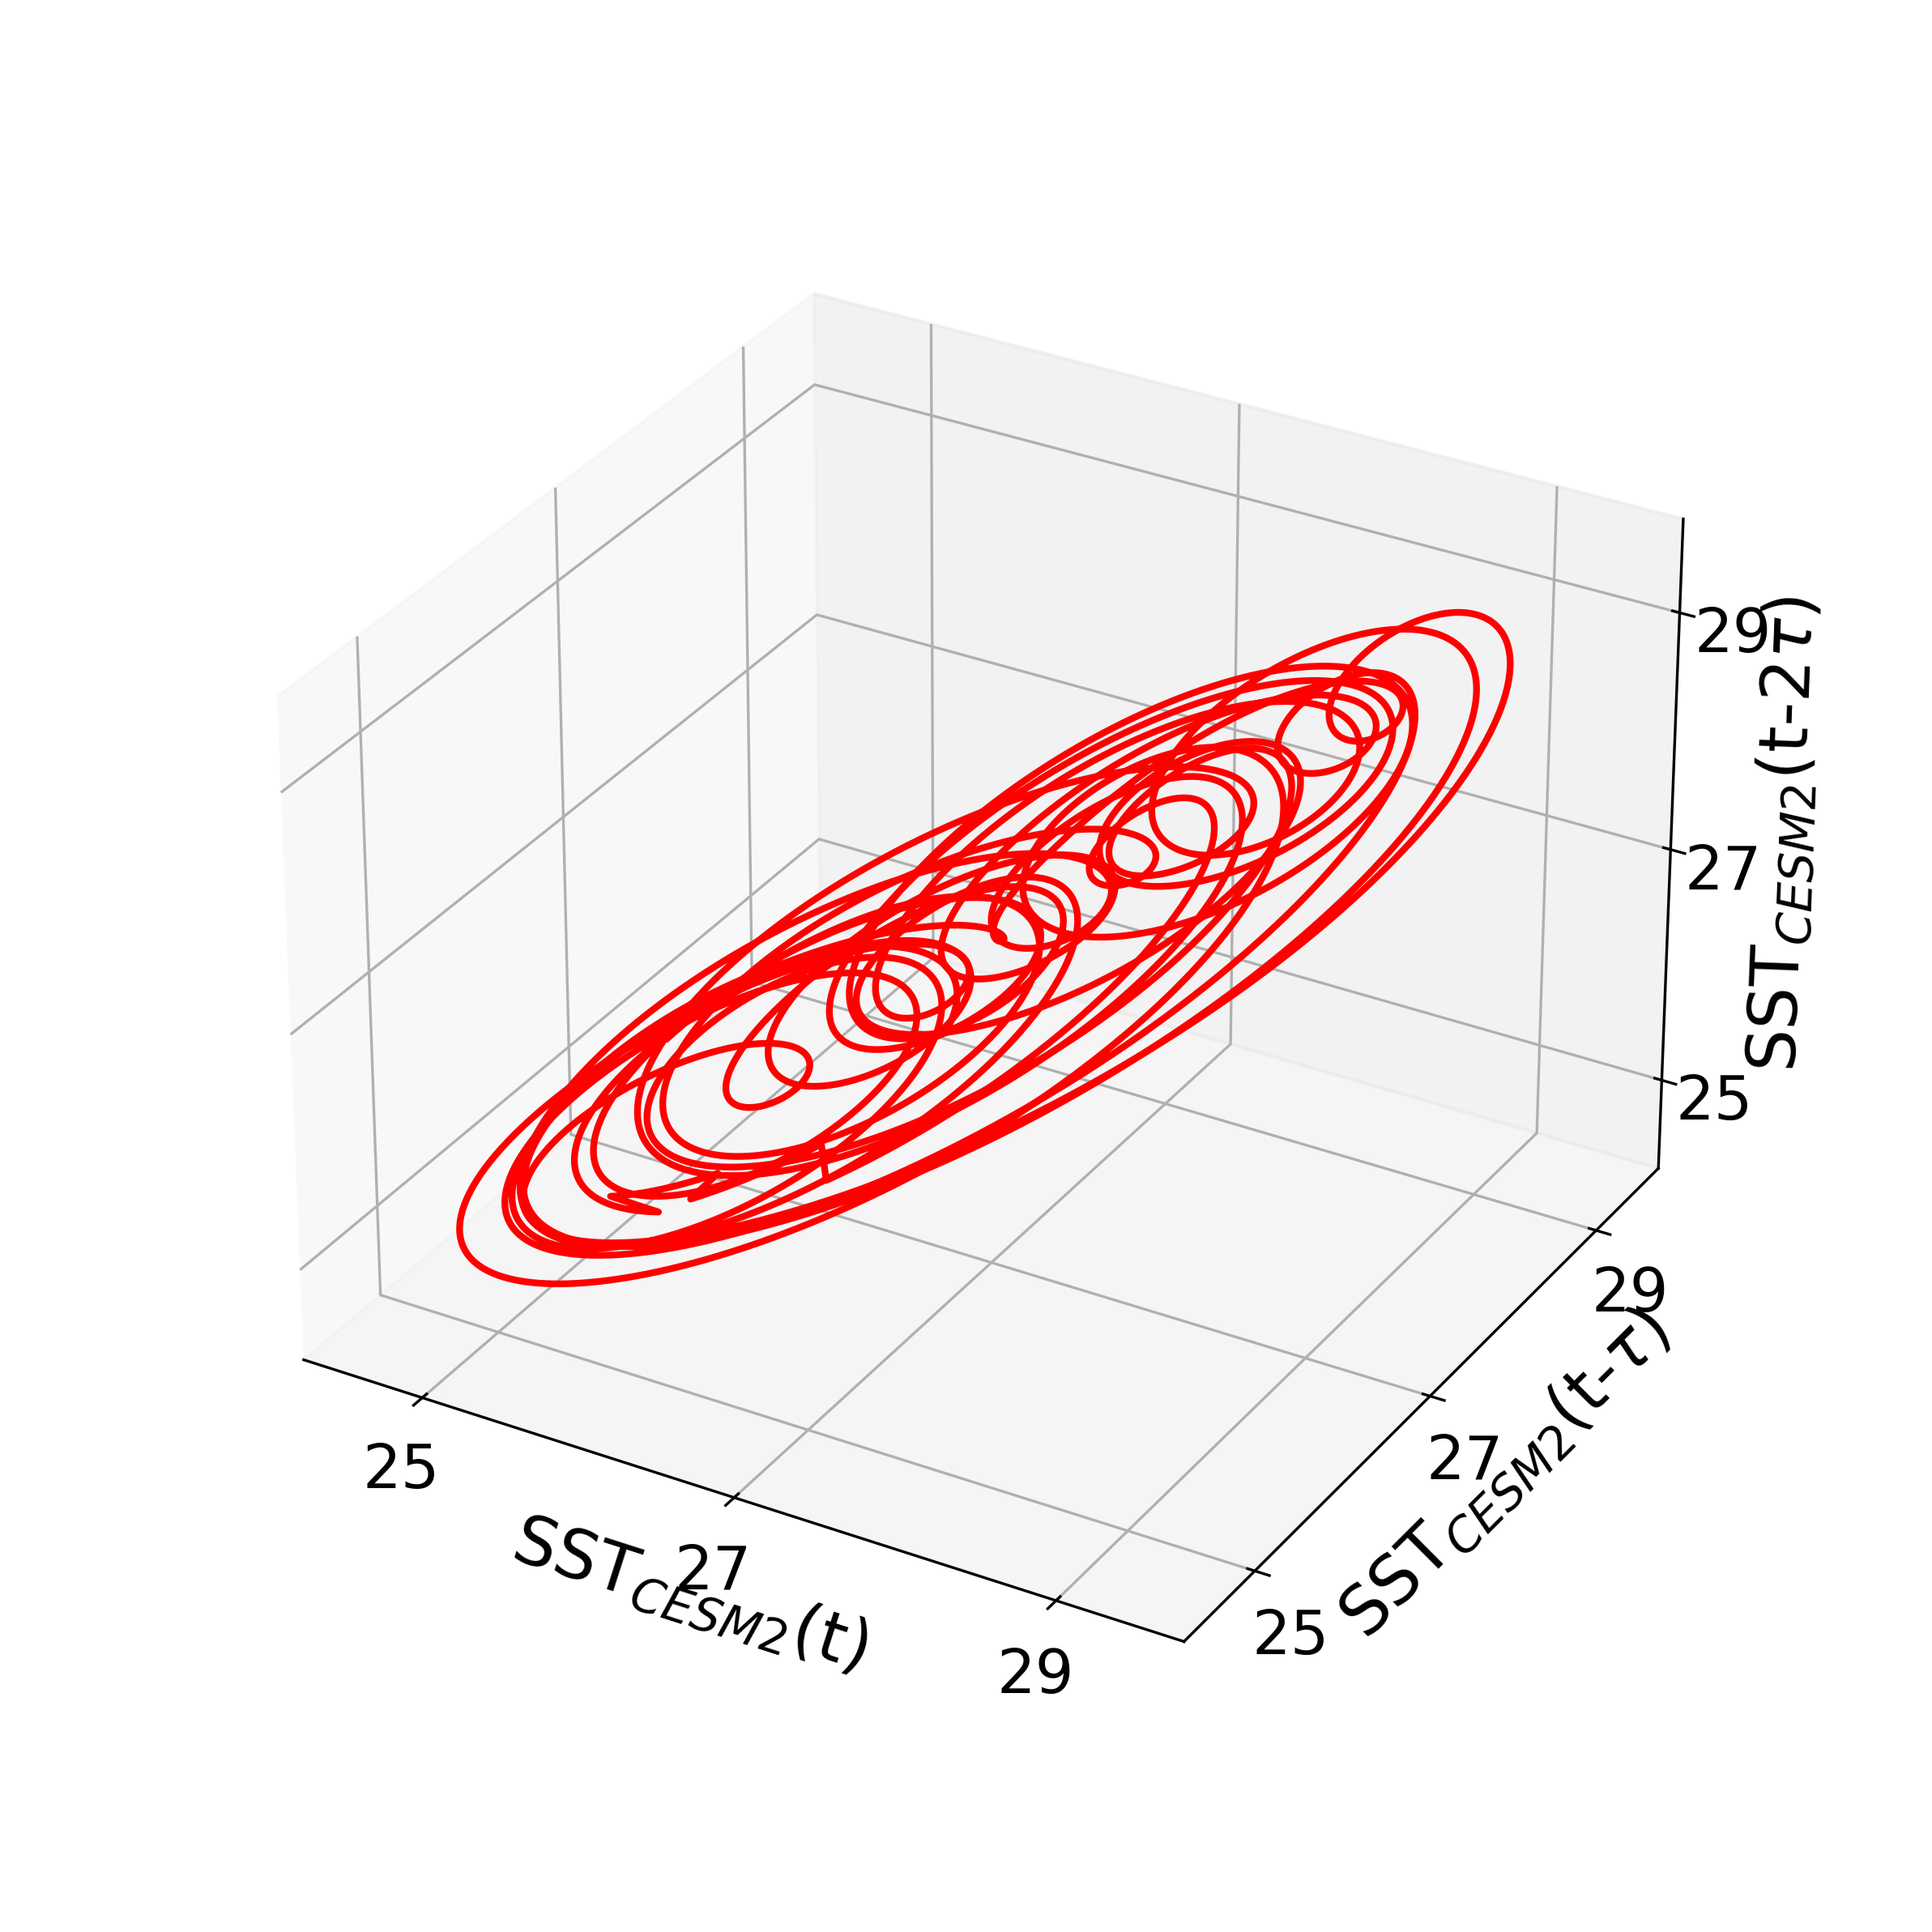

In [248]:

def plot_orbita(df,inicio,fin,color='-k'):
  """                                                                                                                                                    
  Scaling is done from here...                                                                                                                           
  """
  x_scale=1
  y_scale=1
  z_scale=1

  scale=np.diag([x_scale, y_scale, z_scale, 1.0])
  scale=scale*(1.0/scale.max())
  scale[3,3]=1.2


  def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)

  fig = plt.figure(figsize=(10,12),dpi=300)
  ax = fig.add_subplot(111, projection='3d')
  ax.get_proj=short_proj
  ax.plot(df[0][inicio:fin], df[1][inicio:fin], df[2][inicio:fin],color,linewidth=2)
  ax.set_xlim(-4,4)
  ax.set_ylim(-4,4)
  ax.set_zlim3d(-4,4)
  ax.set_xticks([-3, 0, 3])
  ax.set_yticks([-3, 0, 3])
  ax.set_zticks([-3, 0, 3])
  ax.set_xticklabels([25,27,29])
  ax.set_yticklabels([25,27,29])
  ax.set_zticklabels([25,27,29])
  ax.tick_params(axis='both', labelsize= 18)
  ax.set_xlabel(r'SST$_{CESM2}$(t)',fontsize=20)
  ax.set_ylabel(r'SST$_{CESM2}$(t-$\tau$)',fontsize=20)
  ax.set_zlabel(r'SST$_{CESM2}$(t-2$\tau$)',fontsize=20)
  return ax


df = fd.embedding(30,np.array(corregido[:])-np.mean(corregido))
fig = plot_orbita(df,0,10000,'r')